In [2]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np
import math 

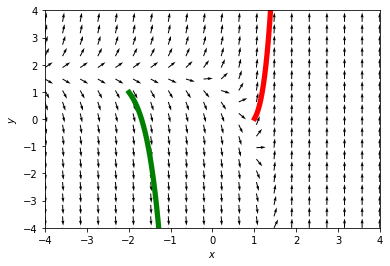

In [3]:
fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= np.exp(2*x[0])+(3*x[1])-5  ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[1,0],[-2,1]]
color=['r','g']


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-4,4,20),np.linspace(-4,4,20) )

V = np.exp(2*X)+(3*Y)-5  ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Limits of the graph
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [15]:
#To find the constants.
import math
import numpy as np
levels_solution = []
x=1
y=0
C= np.exp(-x)+(y*np.exp(-3*x))-((5/3)*np.exp(-3*x))
print('C value is',C)
levels_solution.append(C)

x=-2
y=1
C1 = np.exp(-x)+(y*np.exp(-3*x))-((5/3)*np.exp(-3*x))
print('C1 value is',C1)
levels_solution.append(C1)

C value is 0.2849009938916691
C1 value is -261.56347289622613


In [16]:
## Levels we are interested to compare solution from gradient field
print(levels_solution)
levels=sorted(levels_solution)
print(levels)## Ordenado para plotear las contour curves

[0.2849009938916691, -261.56347289622613]
[-261.56347289622613, 0.2849009938916691]


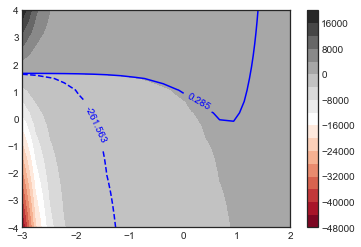

In [18]:
#I have integrate to find y_exact but we see that it is impossible to find y, it is implicit. So we decide to do contour curves.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

xs = np.linspace(-3,2, 20)
ys = np.linspace(-4, 4, 20)

def fs(xs, ys): #y_exact equation without constant
    return np.exp(-xs)+(ys*np.exp(-3*xs))-((5/3)*np.exp(-3*xs))

X,Y = np.meshgrid(xs, ys)

Z = fs(X,Y)

contours = plt.contour(X, Y, Z, levels, colors='blue')
plt.clabel(contours, inline=1, fontsize=10)

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()